In [3]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bench = BenchmarkSet("iaml_glmnet", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

In [14]:
df = pd.read_csv(bench.config.get_path("dataset"))

In [43]:
def plot_true_lc(ccs, target):
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target],
                 color = colors[i], marker = "o", linestyle="None", alpha=0.5)

In [44]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        if bench.config.config_id == "iaml_ranger":
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

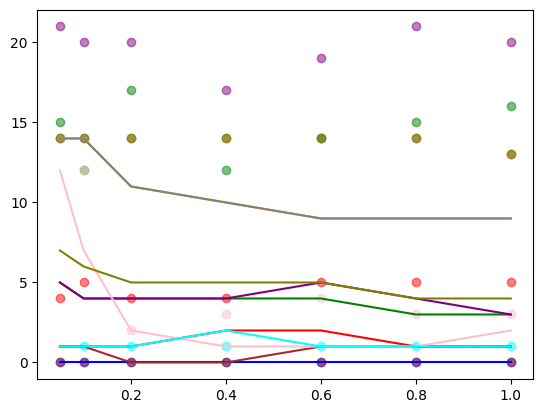

In [48]:
# Draw a sample configuration
ccs = [df.sample(1).to_dict() for i in range(10)]
target = "nf"
#target = "val_accuracy"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
#fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [47]:
ccs

[{'task_id': {10085: 41146},
  'trainsize': {10085: 0.4},
  'alpha': {10085: 0.399498522980139},
  's': {10085: 0.0026015549427361},
  'mmce': {10085: 0.0874306402439024},
  'f1': {10085: 0.909241256849077},
  'auc': {10085: 0.964767905318006},
  'logloss': {10085: 0.233719440035394},
  'ramtrain': {10085: 11.6},
  'rammodel': {10085: 0.100872},
  'rampredict': {10085: 12.8},
  'timetrain': {10085: 0.20699999999988},
  'timepredict': {10085: 0.179000000000087},
  'mec': {10085: 1.0},
  'ias': {10085: 2.25357546423943e-05},
  'nf': {10085: 16}},
 {'task_id': {1114: 40981},
  'trainsize': {1114: 0.1},
  'alpha': {1114: 0.582960458705202},
  's': {1114: 6.88031043928061},
  'mmce': {1114: 0.444927536231884},
  'f1': {1114: 0.713690529401381},
  'auc': {1114: 0.5},
  'logloss': {1114: 0.69856996197199},
  'ramtrain': {1114: 15.1},
  'rammodel': {1114: 0.14156},
  'rampredict': {1114: 16.4},
  'timetrain': {1114: 0.260000000000218},
  'timepredict': {1114: 0.217000000000098},
  'mec': {1114